# Prepare the environment

## For Manipulation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.__version__

'1.2.5'

In [3]:
!pip install ipywidgets==7.7.0

     |████████████████████████████████| 123 kB 10.9 MB/s 
     |████████████████████████████████| 1.6 MB 35.9 MB/s 
     |████████████████████████████████| 245 kB 41.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
# others libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

## For Model

In [69]:
# for randomly split our data into training and testing data
from sklearn.model_selection import train_test_split

# for using linear models
from sklearn.linear_model import LinearRegression

# for perform cross-validation
from sklearn.model_selection import cross_val_score
# You can also use the function 'cross_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict

# to use polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# to use Ridge regression
from sklearn.linear_model import Ridge

# to use GrisSearchCV and find the best hyperparameter
from sklearn.model_selection import GridSearchCV

## Read our dataframe

In [5]:
path_file = 'cars_to_model_evaluation_and_refine.csv'
path_file

'cars_to_model_evaluation_and_refine.csv'

In [6]:
# read our data frame
df_cars = pd.read_csv(path_file)
df_cars

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,volvo,std,four,sedan,rwd,front,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,-1,95,volvo,turbo,four,sedan,rwd,front,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,-1,95,volvo,std,four,sedan,rwd,front,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,-1,95,volvo,turbo,four,sedan,rwd,front,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [7]:
# get only the numerical columns
df_cars = df_cars._get_numeric_data()
df_cars.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [8]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   wheel-base         201 non-null    float64
 5   length             201 non-null    float64
 6   width              201 non-null    float64
 7   height             201 non-null    float64
 8   curb-weight        201 non-null    int64  
 9   engine-size        201 non-null    int64  
 10  bore               201 non-null    float64
 11  stroke             197 non-null    float64
 12  compression-ratio  201 non-null    float64
 13  horsepower         201 non-null    float64
 14  peak-rpm           201 non-null    float64
 15  city-mpg           201 non-null    int64  
 16  highway-mpg        201 non

## Functions for plotting

In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

In [10]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
        
    # x_train, y_train: training data 
    # x_test, y_test: testing data 
    # lr: linear regression object 
    # poly_transform: polynomial transformation object
 
    xmax = max([xtrain.values.max(), xtest.values.max()])

    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

An important step to testing your model is split your data

In [11]:
# first we create dataframes to our price data and the others

y_data = df_cars['price']

x_data = df_cars.drop(['price'], axis = 1)

In [12]:
# we randomly split our data into training and testing data

# test_size = proportion of data to split for example 0.10 = 10%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

# to compare our testing and training data
print('Number of training data: ', x_train.shape[0])
print('Number of test data: ', x_test.shape[0])

Number of training data:  180
Number of test data:  21


In [13]:
# we need to prove to 40% test data and random_state = 0

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print('Number of training data: {}'.format(x_train_1.shape[0]))
print('Number of test data: {}'.format(x_test_1.shape[0]))

Number of training data: 120
Number of test data: 81


## Linear Regression Model

In [14]:
# create the linear regression object
lm = LinearRegression()

# fit the model using the train feature 'horsepower'
lm.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [15]:
# calculate the r^2 using the test data
lm.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [16]:
# calculate the r^2(r_score) using the training data
lm.score(x_train[['horsepower']], y_train)

0.6619724197515104

> We can appreciate the score of test data is much smaller compared to the training data

In [17]:
# Other compare: Find the R^2 on the test data using 40% of the dataset for testing

# create the linear regression object
lm1 = LinearRegression()

# fit out model using the training data of 40%
lm1.fit(x_train_1[['horsepower']], y_train_1)

# calculate R^2 using the test data of 40%
lm1.score(x_test_1[['horsepower']], y_test_1)

0.7139364665406973

> Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation.

## Cross-Validation Score

To evaluate a score by cross-validation

In [18]:
# create the cross validation score

# lm = The object to use to fit the data.
# x_data[['horsepower']] = The data to fit
# y_data = The target variable to try to predict
# cv = Splitting strategy - An iterable that generates (train, test) splits as arrays of indices = folds
Rcross = cross_val_score(lm, x_data[['horsepower']], y_data, cv = 4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
# We can calculate the average and standard deviation of our estimate
print('The mean of the fods are: ', Rcross.mean())
print('The standar desviation of the fods are: ', Rcross.std())

The mean of the fods are:  0.522009915042119
The standar desviation of the fods are:  0.291183944475603


### You can also predict

Use the function 'cross_val_predict' to predict the output

In [20]:
yhat = cross_val_predict(lm, x_data[['horsepower']], y_data, cv = 4)
yhat[:4]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306])

## Overfitting, Underfitting and Model Selection

Is a much better measure of how well your model performs in the real world

It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [21]:
# create the LinearRegression object
lr = LinearRegression()
# fit our model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features
# of our training data
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [22]:
# prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [23]:
# prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

> Let's perform some model evaluation using our training and testing data separately

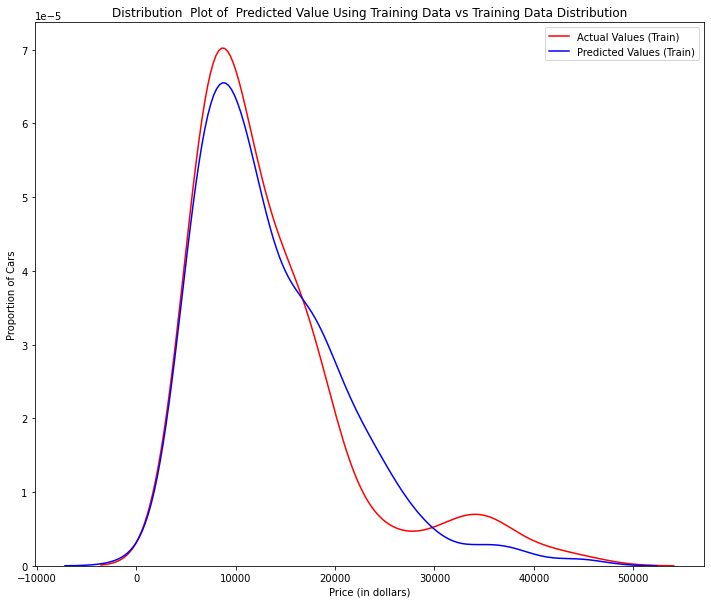

In [24]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values

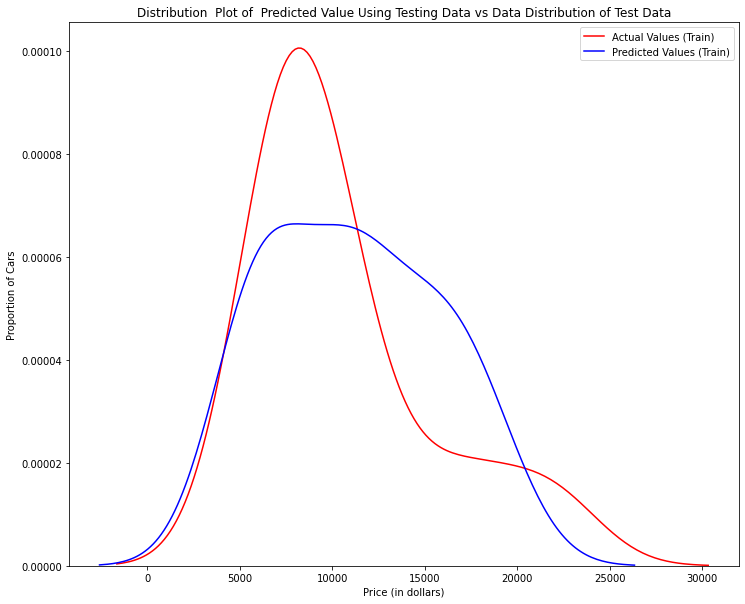

In [25]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

> Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

### Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process.

In [27]:
# split our data using 55% to training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
print('Numero of training data: {}'.format(x_train.shape[0]))
print('Numero of test data: {}'.format(x_test.shape[0]))

Numero of training data: 110
Numero of test data: 91


In [35]:
# perform a polynomial features degree 5 to 'horsepower'

# create a polynomialfeatures object
pr = PolynomialFeatures(degree=5)
# transform 'horsepower' in a polynomial degree 5 in array 
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [37]:
print("Shape x_train['horsepower']: 1")
print("Shape x_train_pr: {}".format(x_train_pr.shape[1]))

Shape x_train['horsepower']: 1
Shape x_train_pr: 6


In [38]:
# we can see the first 5 rows
x_train_pr[:5]

array([[1.00000000e+00, 1.01000000e+02, 1.02010000e+04, 1.03030100e+06,
        1.04060401e+08, 1.05101005e+10],
       [1.00000000e+00, 1.62000000e+02, 2.62440000e+04, 4.25152800e+06,
        6.88747536e+08, 1.11577101e+11],
       [1.00000000e+00, 6.80000000e+01, 4.62400000e+03, 3.14432000e+05,
        2.13813760e+07, 1.45393357e+09],
       [1.00000000e+00, 1.60000000e+02, 2.56000000e+04, 4.09600000e+06,
        6.55360000e+08, 1.04857600e+11],
       [1.00000000e+00, 5.20000000e+01, 2.70400000e+03, 1.40608000e+05,
        7.31161600e+06, 3.80204032e+08]])

Now we are goint to create a LinearRegression model and train it

In [39]:
# create our LinearRegression object
poly = LinearRegression()
# fit with our fitted transform of the training data: x_train_pr
poly.fit(x_train_pr,y_train)

LinearRegression()

In [41]:
# now we predict our model using test data
yhat = poly.predict(x_test_pr)
yhat[:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [45]:
# we can compare the first predict values
print('Test data:', y_test[:5].values)
print('Predicted test data:', yhat[:5])

Test data: [ 6295. 10698. 13860. 13499. 15750.]
Predicted test data: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015
 19995.95195136]


> A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

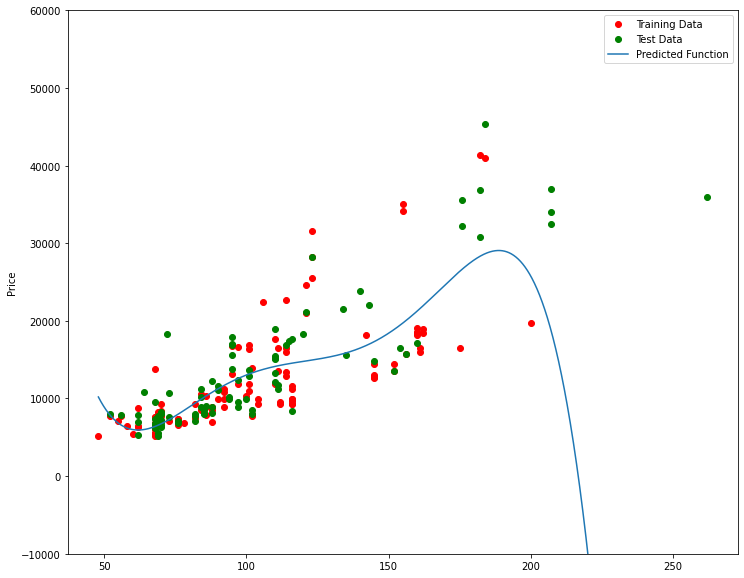

In [47]:
# we display our result to appreciate training data, testing data and predicted function

# x_train, y_train: training data 
# x_test, y_test: testing data 
# lr: linear regression object 
# poly_transform: polynomial transformation object
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

The lower the R^2, the worse the model. A negative R^2 is a sign of **overfitting**.

In [48]:
# now r^2 of the training data
poly.score(x_train_pr, y_train)

0.556771690212023

In [49]:
# r^2 of the test data
poly.score(x_test_pr, y_test)

-29.87134030204415

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results

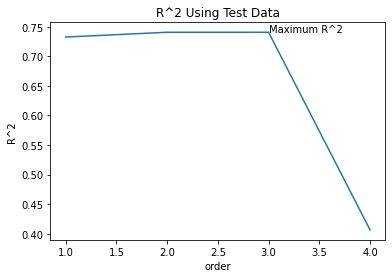

In [60]:
# to save or r^2
Rsqu_test = []

# craete an array of orders
order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr = LinearRegression()
    lr.fit(x_train_pr, y_train)

    r_score = lr.score(x_test_pr, y_test)
    Rsqu_test.append(r_score)

# now plot our result
plt.plot(order, Rsqu_test)

plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.74, 'Maximum R^2 ')
plt.show()

> We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

### Ridge Regression

Ridge Regression see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

In [62]:
# Let's perform a degree two polynomial transformation on our data

pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [64]:
# create a Ridge regression object setting our regularization parameter alpha = 0.1
RidgeModel = Ridge(alpha=0.1)
RidgeModel

Ridge(alpha=0.1)

In [65]:
# we can fit
RidgeModel.fit(x_train_pr, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

In [66]:
# we can obtein a prediction
yhat = RidgeModel.predict(x_test_pr)

In [67]:
# compare our fist 5 values of our test data
print('Test data:', y_test[:4].values)
print('Predicted Test data:', yhat[:4])

Test data: [ 6295. 10698. 13860. 13499.]
Predicted Test data: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]


In [68]:
# we can get the score
RidgeModel.score(x_test_pr, y_test)

0.5267273867505697

### Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [71]:
# first we create an array of a dictionary of parameter values
parameters = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [72]:
# create a ridge regression model
RR = Ridge()

In [74]:
# create a grid search object
Grid = GridSearchCV(RR, parameters, cv = 4)

In [76]:
# fit our model
Grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable

In [78]:
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=10000)

In [79]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fabb4e41-fcd2-4421-bbfb-772986975631' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>